## Importation des outils (librairies) requises

In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Définition d'une matrice

In [2]:
# Matrice singulière (exemple des notes)
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Matrice d'un système d'équation linéaires (exemple des notes)
B = np.array([[1, 1, 1],
              [-1, 1, -1],
              [45, 21, 8]])
print("Déterminant de A = {: 0.3f}".format(np.linalg.det(A)))
print("Déterminant de B = {: 0.3f}".format(np.linalg.det(B)))

Déterminant de A =  0.000
Déterminant de B = -74.000


## Inversion d'une matrice



In [3]:
B_inv = np.linalg.inv(B)
print("Inverse de B = ")
print(B_inv)

# Solution de l'excercice des notes
b = np.array([[24],[0],[607]])
x = np.matmul(B_inv, b)
print("Solution = ")
print(x)

Inverse de B = 
[[-0.392 -0.176  0.027]
 [ 0.500  0.500 -0.000]
 [ 0.892 -0.324 -0.027]]
Solution = 
[[ 7.000]
 [ 12.000]
 [ 5.000]]


## Définition d'une matrice de rotation 3D

In [7]:
# Matrice de rotation (z) construite automatiquement
r1 = R.from_euler('z', [90], degrees=True)
print("r1 = ")
print(r1.as_dcm()[0])
print("Déterminant de r1 = {: 0.3f}".format(np.linalg.det(r1.as_dcm()[0])))

# Matrice de rotation (z) construite manuellement
r2 = np.array([[np.cos(np.radians(90)), -np.sin(np.radians(90)), 0],
              [np.sin(np.radians(90)), np.cos(np.radians(90)), 0],
              [0.0, 0.0, 1]])
print("r2 =  ")
print(r2)
print("Déterminant de r2 = {: 0.3f}".format(np.linalg.det(r2)))

r1 = 
[[ 0.000 -1.000  0.000]
 [ 1.000  0.000  0.000]
 [ 0.000  0.000  1.000]]
Déterminant de r1 =  1.000
r2 =  
[[ 0.000 -1.000  0.000]
 [ 1.000  0.000  0.000]
 [ 0.000  0.000  1.000]]
Déterminant de r2 =  1.000


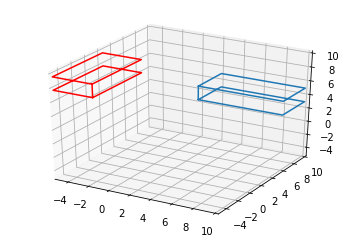

In [8]:
## Application à une géométrie (points 3D)
pts = np.array([[2, 10, 10, 2, 2, 2, 10, 10, 2, 2],
       [6, 6, 10, 10, 6, 6, 6, 10, 10, 6],
       [3, 3, 3, 3, 3, 5, 5, 5, 5, 5]])
pts_rot = np.matmul(r2, pts)

# Visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-5, 10])
ax.set_ylim3d([-5,10])
ax.set_zlim3d([-5,10])
ax.plot(pts[0],pts[1],pts[2])
ax.plot(pts_rot[0],pts_rot[1],pts_rot[2],color='r')

## Transformations homogènes
On ajoute une coordonnée supplémentaire (homogène) pour permettre une représentation uniforme des translations et des rotations.

In [9]:
# Matrice de rotation (z) construite manuellement
r2_hom = np.array([[np.cos(np.radians(90)), -np.sin(np.radians(90)), 0, 0],
              [np.sin(np.radians(90)), np.cos(np.radians(90)), 0, 0],
              [0.0, 0.0, 1, 0],
              [0.0, 0.0, 0, 1]])

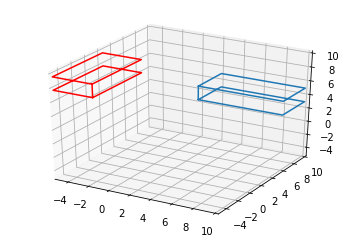

In [10]:
## Application à une géométrie (points 3D en format homogène)
pts_hom = np.array([[2, 10, 10, 2, 2, 2, 10, 10, 2, 2],
       [6, 6, 10, 10, 6, 6, 6, 10, 10, 6],
       [3, 3, 3, 3, 3, 5, 5, 5, 5, 5],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
pts_hom_rot = np.matmul(r2_hom, pts_hom)

# Visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-5, 10])
ax.set_ylim3d([-5,10])
ax.set_zlim3d([-5,10])
ax.plot(pts[0],pts[1],pts[2])
ax.plot(pts_hom_rot[0],pts_hom_rot[1],pts_hom_rot[2], color='r')

In [11]:
## Transformée concaténée
# Translation de [6, 8, 4]
t2_hom = np.array([[1, 0, 0, 6],
              [0, 1, 0, 8],
              [0, 0, 1, 4],
              [0, 0, 0, 1]])
# Mise à l'échelle de [2, 1, 1/2]
s1_hom = np.array([[2, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1/2, 0],
              [0, 0, 0, 1]])
# Translation de [-6, -8, -4]
t1_hom = np.array([[1, 0, 0, -6],
              [0, 1, 0, -8],
              [0, 0, 1, -4],
              [0, 0, 0, 1]])
TC = np.matmul(np.matmul(t2_hom,s1_hom),t1_hom)
print("Transformée concaténée = ")
print(TC)

Transformée concaténée = 
[[ 2  0  0 -6]
 [ 0  1  0  0]
 [ 0  0  0  4]
 [ 0  0  0  1]]


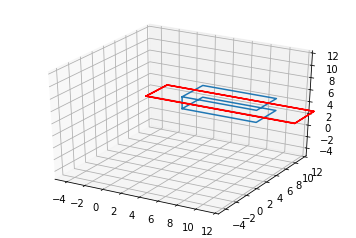

In [12]:
## Application à une géométrie (points 3D en format homogène)
pts_tr = np.matmul(TC, pts_hom)

# Visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-5, 12])
ax.set_ylim3d([-5,12])
ax.set_zlim3d([-5,12])
ax.plot(pts[0],pts[1],pts[2])
ax.plot(pts_tr[0],pts_tr[1],pts_tr[2], color='r')

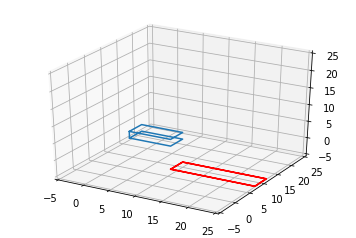

In [13]:
## Changement de l'ordre des transformations (T1 <-> T2)
TC = np.matmul(np.matmul(t1_hom,s1_hom),t2_hom)
pts_tr = np.matmul(TC, pts_hom)

# Visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-5, 25])
ax.set_ylim3d([-5,25])
ax.set_zlim3d([-5,25])
ax.plot(pts[0],pts[1],pts[2])
ax.plot(pts_tr[0],pts_tr[1],pts_tr[2], color='r')

## Application des transformées à des repères géométriques

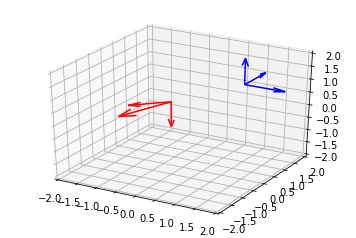

In [14]:
origine = np.array([[1],
                [1],
                [1],
                [1]])
vecteur = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1],
                [1, 1, 1]])

# Translation de [-1, 0, -1/2]
t2_hom = np.array([[1, 0, 0, -1],
              [0, 1, 0, 0],
              [0, 0, 1, -1/2],
              [0, 0, 0, 1]])
r2_hom = np.array([[np.cos(np.radians(45)), -np.sin(np.radians(45)), 0, 0],
              [np.sin(np.radians(45)), np.cos(np.radians(45)), 0, 0],
              [0.0, 0.0, 1, 0],
              [0, 0, 0, 1]])
origine_tr = np.matmul(np.matmul(r2_hom,t2_hom), origine)
vecteur_tr = np.matmul(np.matmul(r2_hom,t2_hom), vecteur)

# Visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.quiver(origine[0],origine[1],origine[2],vecteur[0],vecteur[1],vecteur[2],color='b')
ax.quiver(origine_tr[0],origine_tr[1],origine_tr[2],vecteur_tr[0],vecteur_tr[1],vecteur_tr[2],color='r')